# Importing pandas and numpy libs

In [130]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reading the dataset and loading into pandas dataframe

In [131]:
df = pd.read_csv("/Users/yashmahajan/Desktop/DSBDA Lab/Datasets/DSBDAL-Exam-datasets/3-4. AcademicPerformance.csv")
df

,Rollno,Marks,Gender,Age,PhD
0,1,140.0,1,47.0,Yes
1,2,30.0,0,65.0,Yes
2,3,35.1,0,56.0,No
3,4,30.0,1,23.0,No
4,5,80.0,0,NaN,Yes
...,...,...,...,...,...
95,96,18.6,1,26.0,No
96,97,152.0,1,56.0,Yes
97,98,1.8,1,28.0,No
98,99,35.0,0,44.0,NaN


In [132]:
df.shape

(100, 5)

In [133]:
df.dtypes

Rollno      int64
Marks     float64
Gender      int64
Age       float64
PhD        object
dtype: object

# Handle the Missing value
Handle the Missing value

In [134]:
df.isna().sum()

Rollno     0
Marks      0
Gender     0
Age       16
PhD       13
dtype: int64

# Make a list of column having missing value

In [135]:
cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)

cols_with_na

['Age', 'PhD']

# Fill the missing value using mean for float and int datatypes and for other forword fill

In [136]:
for col in cols_with_na:
    col_dt = df[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):
        outliers = (df[col] < 0) | (100 < df[col])
        df.loc[outliers, col] = np.nan
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(method='ffill')
df

,Rollno,Marks,Gender,Age,PhD
0,1,140.0,1,47.000000,Yes
1,2,30.0,0,65.000000,Yes
2,3,35.1,0,56.000000,No
3,4,30.0,1,23.000000,No
4,5,80.0,0,47.821429,Yes
...,...,...,...,...,...
95,96,18.6,1,26.000000,No
96,97,152.0,1,56.000000,Yes
97,98,1.8,1,28.000000,No
98,99,35.0,0,44.000000,No


# Outliers Detection

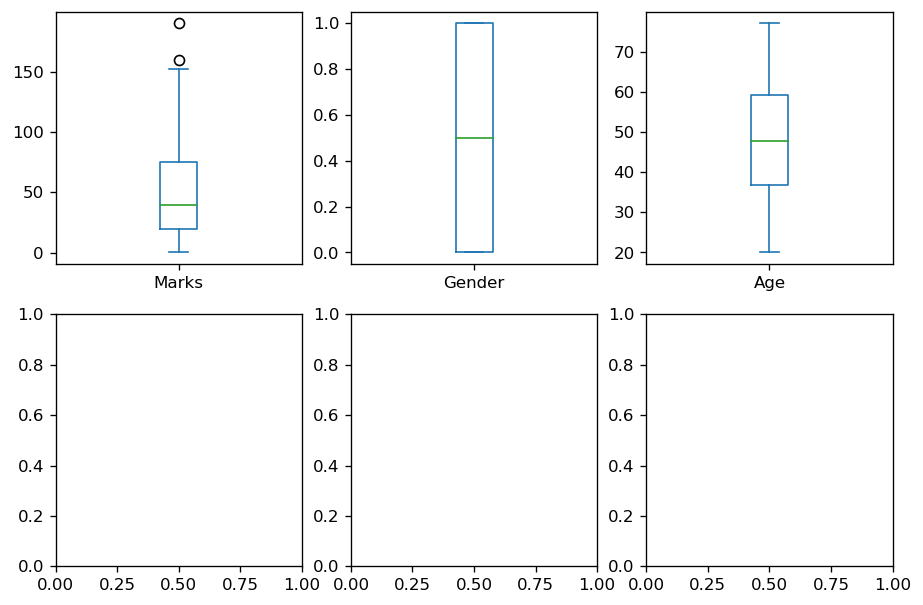

In [137]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 6)
df_list = ['Marks', 'Gender', 'Age']
fig, axes = plt.subplots(2, 3)
fig.set_dpi(120)

count=0
for r in range(1):
    for c in range(3):
        _ = df[df_list[count]].plot(kind = 'box', ax=axes[r,c])
        count+=1

# Removal of Outliers from Marks

In [138]:
Q1 = df['Marks'].quantile(0.25)
Q3 = df['Marks'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR

print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')

Q1 = 20.0, Q3 = 75.5, IQR = 55.5, Lower_limit = -63.25, Upper_limit = 158.75


In [139]:
df[(df['Marks'] < Lower_limit) | (df['Marks'] > Upper_limit)]

,Rollno,Marks,Gender,Age,PhD
18,19,190.0,1,66.0,Yes
56,57,160.0,1,61.0,Yes


In [140]:
df = df.drop([18,56], axis=0)

# As You Can See The Outliers are Removed : 

In [141]:
df[(df['Marks'] < Lower_limit) | (df['Marks'] > Upper_limit)]

,Rollno,Marks,Gender,Age,PhD


In [142]:
df

,Rollno,Marks,Gender,Age,PhD
0,1,140.0,1,47.000000,Yes
1,2,30.0,0,65.000000,Yes
2,3,35.1,0,56.000000,No
3,4,30.0,1,23.000000,No
4,5,80.0,0,47.821429,Yes
...,...,...,...,...,...
95,96,18.6,1,26.000000,No
96,97,152.0,1,56.000000,Yes
97,98,1.8,1,28.000000,No
98,99,35.0,0,44.000000,No
